In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("tic-tac-toe-endgame.csv")

In [3]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive
...,...,...,...,...,...,...,...,...,...,...
953,o,x,x,x,o,o,o,x,x,negative
954,o,x,o,x,x,o,x,o,x,negative
955,o,x,o,x,o,x,x,o,x,negative
956,o,x,o,o,x,x,x,o,x,negative


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
K = df.keys()

In [6]:
for i in K:
    Le = LabelEncoder()
    Le = Le.fit_transform(df[i])
    df[i] = Le

In [7]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,2,2,2,2,1,1,2,1,1,1
1,2,2,2,2,1,1,1,2,1,1
2,2,2,2,2,1,1,1,1,2,1
3,2,2,2,2,1,1,1,0,0,1
4,2,2,2,2,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2,2,1,1,1,2,2,0
954,1,2,1,2,2,1,2,1,2,0
955,1,2,1,2,1,2,2,1,2,0
956,1,2,1,1,2,2,2,1,2,0


In [8]:
x = df.iloc[:, :9]
y = df["V10"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
model = DecisionTreeClassifier()

In [13]:
model = model.fit(trainX, trainY)

In [14]:
pred = model.predict(testX)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(pred, testY)

0.90625

In [17]:
NewData = [2,2,1,0,2,0,1,2,1]

In [18]:
model.predict([NewData])

array([1])

In [19]:
# Rf

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf_model = RandomForestClassifier(n_estimators=5)

In [22]:
rf_model = rf_model.fit(trainX,trainY)

In [23]:
pred = rf_model.predict(testX)

In [24]:
accuracy_score(pred, testY)

0.9322916666666666

In [25]:
trainAcc = []
testAcc = []

In [26]:
for i in range(2, 30):
    rf_model = RandomForestClassifier(n_estimators=i)
    rf_model = rf_model.fit(trainX,trainY)
    trainAcc.append(accuracy_score(rf_model.predict(trainX), trainY))
    testAcc.append(accuracy_score(rf_model.predict(testX), testY))
    

In [27]:
bestAcc = max(testAcc)

In [28]:
BestN = testAcc.index(bestAcc) + 2

In [29]:
BestN

22

In [30]:
import matplotlib.pyplot as plt

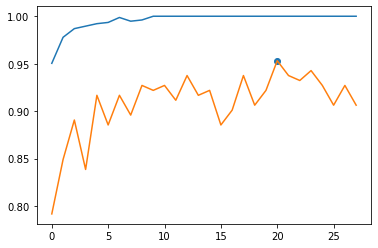

In [31]:
plt.plot(trainAcc)
plt.plot(testAcc)
plt.scatter(BestN-2, bestAcc)
plt.show()